## 6. Phase osztály

A `Phase` osztály főként az FT kiértékelési módszer miatt jött létre, itt ugyanis nem feltétlen szükséges kikötni, hogy a fázis polinommal közelíthető. A koszinusz-függvény illesztéses módszeren kívül az összes kiértékelési eljárás ezt az osztályt használja. Miután a megfelelő számolásokat elvégeztük az adott módszer attribútumaként elérhetővé válik a `phase` vagy a `GD`. Mivel a WFT és SPP módszernél a csoportkésleltetés görbét kapjuk meg, így azokon a `GD`, míg a Fourier-transzformáción alapuló és a minimum-maximum módszernél a fázist, így ezeken a `phase` válik elérhetővé. A két görbe megkülönböztetését a `GD_mode` argumentum szabályozza. Nézzük meg egy generikus példán:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pysprint.core.phase import Phase

Ehhez itt egy tetszőleges polinomot használok:

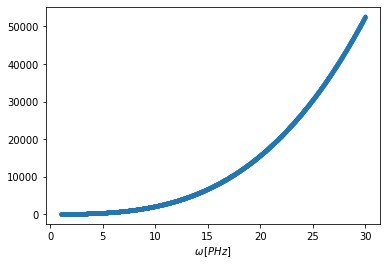

In [2]:
x = np.linspace(1, 30, 2000)
y = 2 * x ** 3 - 3 * x ** 2 + 45 * x + 3

fazis = Phase(x, y)
fazis.plot()

A `fit` függvénnyel ráillesztek egy harmadfokú görbét:

In [3]:
fazis.fit(reference_point=0, order=3);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Itt látható, hogy a megadott együtthatókat adta vissza a megfelelő faktoriálissal szorozva.
Ha ugyan ezt `GD_mode=True` mellett végzem el:

In [4]:
GD = Phase(x, y, GD_mode=True)
GD.fit(reference_point=0, order=4);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Itt megjegyezném, hogy az `order` kulcsszó minden esetben a **keresett diszperzió rendjét** és nem feltétlenül az illesztés rendjét jelenti. Ennek köszönhető, hogy a harmadfokú polinomra `GD_mode=True` mellett az `order=4` volt a megfelelő, hiszen ekkor kerül harmadfokú görbe illeszésre. Ezeket könnyen le is kérdezhetjük az `order`, illetve a `dispersion_order` argumentumokkal:

In [5]:
print(fazis.order, GD.order)
print(fazis.dispersion_order, GD.dispersion_order)

3 3
3 4


A program illesztés után a kiszámolt együtthatókat elmenti, és a megfelelő kulcsszóval ezek elérhetőek:

In [6]:
fazis.TOD

11.999999999999998

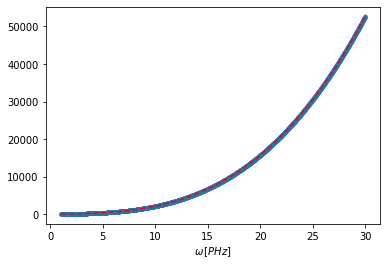

In [7]:
GD.plot()

A hibák az `errorplot` függvénnyel nézhetők meg, a hibák mint `np.ndarray` az `errors` kulcsszóval érhetők el:

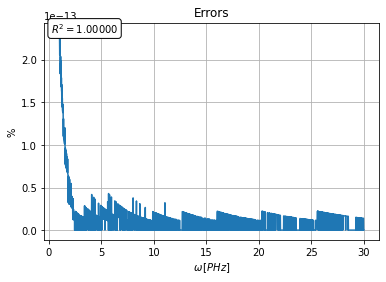

In [8]:
GD.errorplot(percent=True)

In [9]:
GD.errors

array([-1.06581410e-13, -1.06581410e-13, -9.94759830e-14, ...,
        7.27595761e-12,  0.00000000e+00,  0.00000000e+00])

A `slice`, vagyis a kivágás ugyan úgy működik, mint minden kiértékelés esetén:

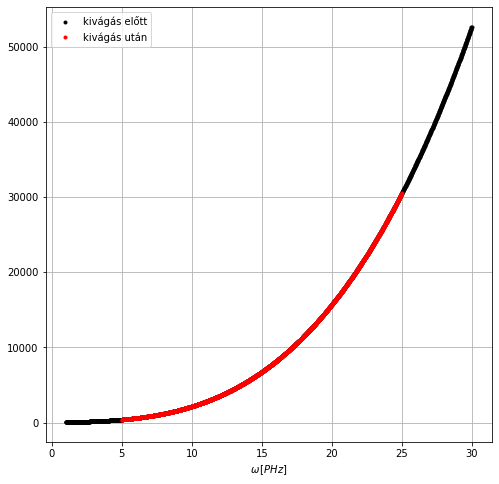

In [10]:
fazis3 = Phase(x, y)

fig, ax = plt.subplots(figsize=(8, 8))

fazis3.plot(ax=ax, color="black", label="kivágás előtt")

fazis3.slice(5, 25)

fazis3.plot(ax=ax, color="red", label="kivágás után")
plt.grid()
plt.legend()

Az objektumban tárolt adatok a `data` függvénnyel érhetők el:

In [11]:
x, y = fazis3.data
print(x, type(x))
print(y, type(y))

[ 5.004002    5.01850925  5.03301651 ... 24.96598299 24.98049025
 24.9949975 ] <class 'numpy.ndarray'>
[  403.66076273   406.06328969   408.47722827 ... 30379.17802734
 30431.94288131 30484.76956137] <class 'numpy.ndarray'>


Természetesen a hibák nem léteznek addig, amíg nem illesztettünk görbét:

In [12]:
fazis3.errors

ValueError: Must fit a curve before requesting errors.

A `Phase` osztályban elérhető több simítási algoritmus is. Ebben a példában az alapértelmezett `gaussian_filter1d` függvényt mutatom be egy zajos adatsoron:

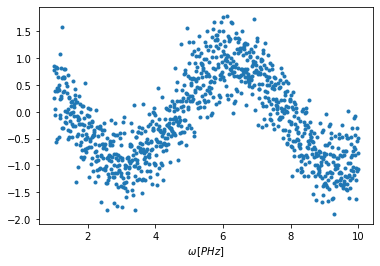

In [13]:
x = np.linspace(1, 10, 1000)
y = np.cos(x) + np.random.normal(0, 0.4, 1000)

zajos = Phase(x, y)
zajos.plot()

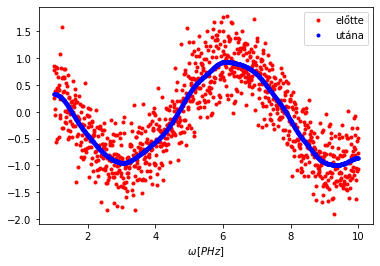

In [14]:
zajos.plot(color="red", label="előtte")
zajos.smooth(method="gaussian_filter1d", sigma=25)
zajos.plot(color="blue", label="utána")
plt.legend()

Ha az adatsorban van egy olyan rész, amit ki szeretnénk vágni, ahhoz használhatjuk a `remove_range(start, stop)` függvényt. Az előbbi adatsorból töröljük ki a 4 és 6 közötti részt.

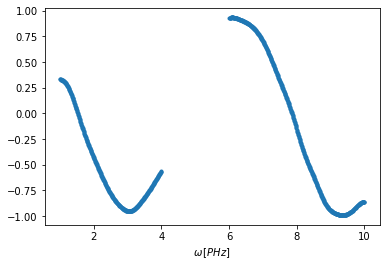

In [15]:
zajos.remove_range(4, 6)
zajos.plot()